# Introducción al análisis de datos (Pre Machine Learning)
------------------------------------------------------


### Data Fundamentals con Python

#### Mayo 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------



En este notebook se revisarán los pasos para cargar y pre-procesar un dataset como paso previo justo antes de aplicar un modelo de Machine Learning a través de un ejemplo. Para ello, se usará **[Python Data Analysis Library](https://pandas.pydata.org/)** (a.k.a. pandas).

Los pasos que se aplican son los siguientes:

*   Cargar una base de datos
*   Eliminar variables que no sean de utilidad
*   Tratar los datos perdidos
*   Crear los conjuntos de entrenamiento y de test
*   Normalizar los datos




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comando obligatorio en Notebooks
%matplotlib inline      
%config InlineBackend.figure_format = 'retina'    # Para figuras de alta calidad



El [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) contiene 10 características relacionadas con tumores de pecho que han sido diagnosticados como benignos o malignos. Tienes una descripción de las 10 características en el link de arriba. Ahí puedes descargar el dataset como un archivo csv. 

Nosotros lo importaremos directamente utilizando la siguiente función.

In [ ]:
def load_spam():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None) #Para que no ponga los nombres de la cabecera
    data.columns=['ID', 'Clump Thickness', 'Uniformity of Cell Size', #defino yo los nombres de las columnas
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
    return data

Los datos se almacenan en un dataframe, un tipo de datos específico de Pandas.

In [ ]:
data = load_spam()

Visualizemos las primeras 10 entradas de los datos con el método `.head()` 

In [ ]:
data.head(10)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


Con el método `.shape()` podemos comprobar cuántas muestras tenemos.

In [ ]:
print('Hay %d muestras con %d características' %(data.shape[0], data.shape[1]))

Hay 699 muestras con 11 características


Haremos los siguientes pasos de preprocesado. Todos implementados en Pandas (es aconsejable para datasets grandes):

- Eliminamos la columna 'ID'. No la usaremos más.

- Analizamos los datos perdidos (codificados en este dataset como '?'). 

- La clase es igual a 2 para tumores benignos y 4 para los malignos. Reemplazaremos esto por 0 y 1 respectivamente.

- Creamos conjuntos de entrenamiento y test.

- Normalizaremos todas las variables de entrada para que tengan media cero y varianza unidad.

### 1. Eliminar la columna ID


Podemos usar el método `.drop()`. Usamos la entrada `inplace=True` para sobreescribir el dataframe existente.

In [ ]:
data.drop('ID', axis=1, inplace=True) #vamos a sobreescribir en el df original

Veamos el resultado

In [ ]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


### 2. Analizar los datos perdidos

Pandas considera los valores `NaN` y `None` para representar datos perdidos. La función `pandas.isnull()` se puede usar para saber si un valor se considera perdido o no. 

Primero cambiemos la codificación que indica dato perdido, `?`, por `NaN`.

In [ ]:
data.replace('?', np.nan, inplace=True)

`inplace` te sobreescribe el dataframe original, `data`, con la modificación que se esté programando.

In [ ]:
pd.isnull(data).sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Observa que sólo una de la columnas tiene 16 datos perdidos. Por simplicidad, eliminemos dicha columna. Sé consciente que en general imputaremos (sustituiremos) los valores perdidos con algún valor representativo.

In [ ]:
data.drop('Bare Nuclei', axis=1, inplace=True)

In [ ]:
pd.isnull(data).sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### 3. Crear una etiqueta de clase binaria

La etiquetas originales tienen los valores 2 y 4 como se observa en el siguiente histograma. Sim embargo, nosotros queremos tener valores enteros consecutivos desde el 0, pues así es el formato de clases apra cualqueir modeo de clasificación en Machine Learning.


<Axes: >

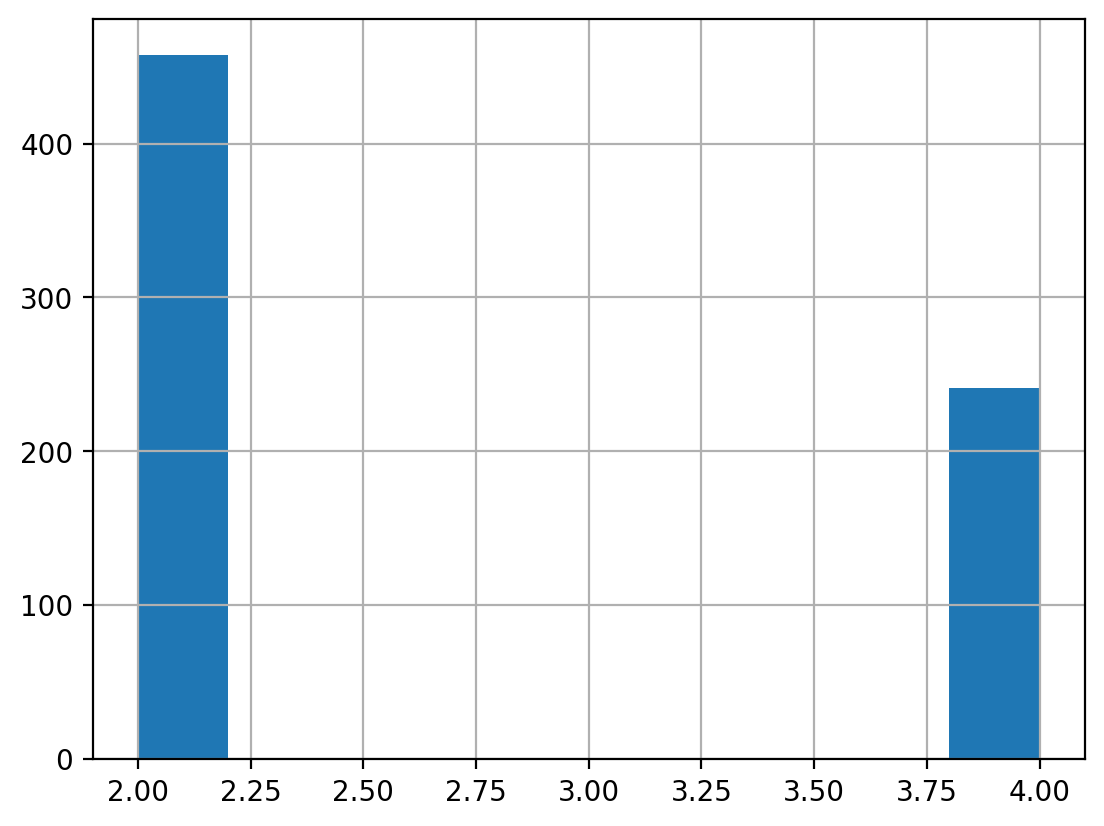

In [ ]:
data['Class'].hist()

Para ello, crearemos una simple función para convertir la etiqueta y almacenar el resultado en una nueva columna del dataframe, `Binary Class`. Además, eliminaremos la columna original con las etiquetas, `Class`.

In [ ]:
def convert_to_binary(l):
    if l == 2:
      l = 0
    else:
      l = 1
    return l      #(l-2.0)/2.   (otra manera de hacerlo)

In [ ]:
data['Binary Class'] = data['Class'].apply(convert_to_binary)

data.drop('Class', axis=1, inplace=True)

In [ ]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Binary Class
0,5,1,1,1,2,3,1,1,0
1,5,4,4,5,7,3,2,1,0
2,3,1,1,1,2,3,1,1,0
3,6,8,8,1,3,3,7,1,0
4,4,1,1,3,2,3,1,1,0
5,8,10,10,8,7,9,7,1,1
6,1,1,1,1,2,3,1,1,0
7,2,1,2,1,2,3,1,1,0
8,2,1,1,1,2,1,1,5,0
9,4,2,1,1,2,2,1,1,0


Miremos ahora el histograma de la etiqueta de la clase binaria.

<Axes: >

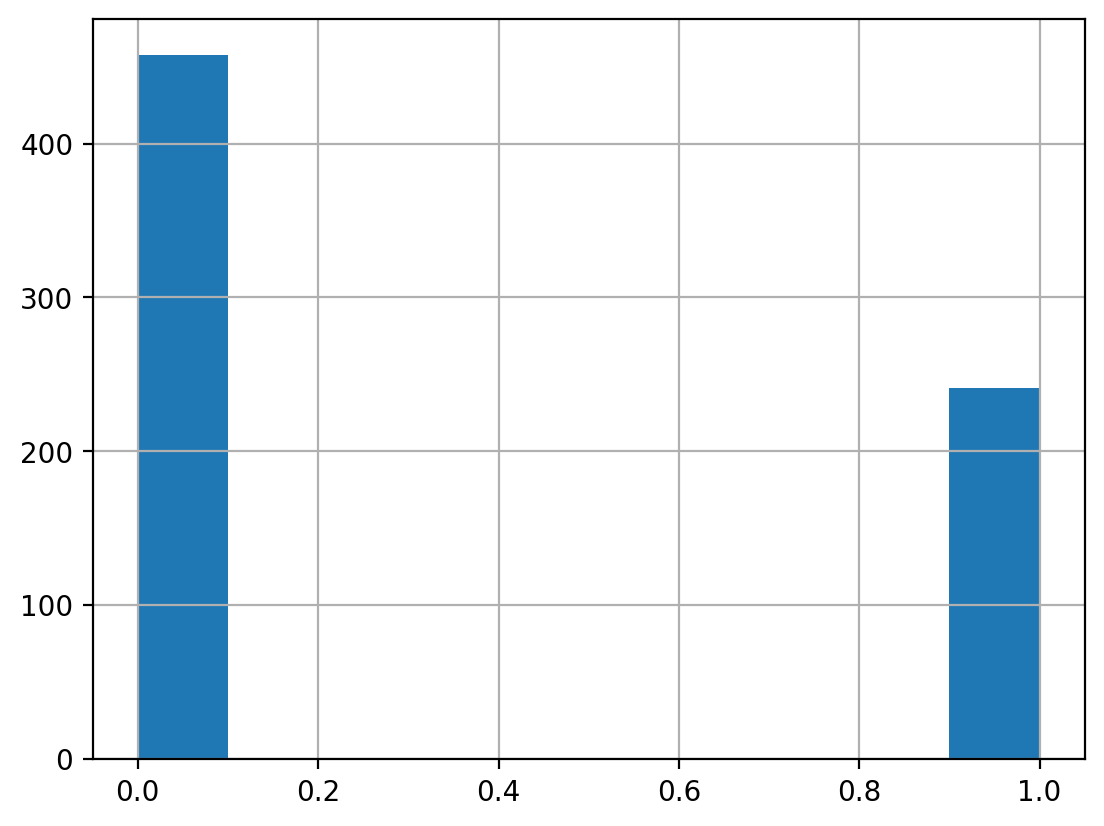

In [ ]:
data['Binary Class'].hist()

### 4. Separar en X e y

Antes de entrenar un modelo supervisado en Machine Learning, debes separar lso datos de entrada (X) y la salida (y). Esto es lo que vamos a hacer a continuación.

In [ ]:
X = data.drop('Binary Class', axis=1)
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [ ]:
y = data['Binary Class']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Binary Class, dtype: int64

### 5. Crear conjuntos de datos de entrenamiento y de test

Simplemente dividiremos el dataset aleatoriamente. El 80% de los datos irá para entrenamiento, y el resto para test. Usaremos la [librería sklearn](https://scikit-learn.org/stable/) para ello. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #el random_state hace una partición aleatoria, para comparar resultados, siempre lo fijamos


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 8)
(140, 8)
(559,)
(140,)


Date cuenta de que hemos almacenado los datos de entrenamiento y de test en diferentes Dataframes, así podemos normalizarlos a continuación sin modificar los datos originales.



### Normalizar las variables de entrada

En general, no es recomendable que las variables de entrada (o características) se definan en diferentes rangos. i.e., $x_1$ toma valores en el rango $[-1,1]$ y $x_2$ entre $[-10^6,10^6]$. 

Para mejorar tanto la robustez de nuestros modelos como la **interpretabilidad**, aplicaremos un paso de preprocesado de normalización para usar las características con media (muestral) 0 y varianza (muestral) igual a 1. 

Dada la matrix de características sin normalizar, $\mathbf{X}_{N\times D}$, calculamos la media muestral por cada columna de las características, $\mu_j$, así como la varianza muestral, $\sigma^2_j$ para $j=1,\ldots,D$. Luego, cada fila de la matriz de características normalizadas $\overline{\mathbf{X}}_{N\times D}$ se obtiene de la siguiente manera:

$$\overline{\mathbf{x}}^{(i)}= \left[\frac{x_1^{(i)}-\mu_1}{\sqrt{\sigma^2_1}}, ~~ \frac{x_2^{(i)}-\mu_2}{\sqrt{\sigma^2_2}}, \ldots, \frac{x_D^{(i)}-\mu_D}{\sqrt{\sigma^2_D}}\right]$$

**Ten en cuenta que esto no afecta a la solución del modelo que luego vayamos a aplicar**, simplemente estamos reescalando el vector de los parámetros $\boldsymbol{w}$ que el modelo de Machine Learning ajustará. Usando esta escala, ahora podemos comparar el efecto de cada variable en la solución del modelo de una manera efectiva: **cuanto más grande sea el parámetro asociado a una característica, $|w_j|$, más afectará esa característica $j$-th en la estimación de la clase**.

Un aspecto importante es que el conjunto de test se normaliza **usando las estadísticas del conjunto de entrenamiento (media y varianza)**.

Esta normalización la haremos automáticamente con la misma librería anterior, `sklearn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit es para ajustar los datos para después transformarlo
X_test_scaled = scaler.transform(X_test) # aquí no se hace fit porque se supone que no los tiene

Si los quieres volver a convertir a dataframe, sería de la sigueinte manera. Pero en la realidad como lo siguiente en entrenar un modelo de Machine Learning, se suelen dejar como numpy arrays (la salida del `StandardScaler`)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled.head() #centrada en 0 y varianza 1

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.164886,-0.383175,-0.760698,-0.642507,-0.554964,-0.183205,-0.601492,-0.349724
1,0.164886,-0.054655,-0.096276,0.405629,-0.554964,-0.183205,0.392303,-0.349724
2,-1.236959,-0.711694,-0.760698,-0.293128,-0.554964,-0.183205,-0.601492,-0.349724
3,0.164886,-0.711694,-0.760698,-0.642507,-0.554964,-0.586401,-0.601492,-0.349724
4,-0.886498,-0.711694,-0.096276,-0.293128,-0.554964,-0.586401,-0.601492,-0.349724


In [ ]:
X_test_scaled.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,-1.236959,-0.711694,-0.428487,-0.642507,-0.113048,-0.989597,-0.601492,-0.349724
1,-0.185575,-0.711694,-0.760698,-0.642507,-0.554964,-0.586401,-0.601492,-0.349724
2,-0.536036,-0.711694,-0.760698,-0.642507,-0.554964,-0.183205,-0.601492,-0.349724
3,0.164886,0.602383,0.568146,1.104387,-0.113048,-0.183205,-0.601492,-0.349724
4,-0.536036,-0.711694,-0.760698,-0.642507,-0.554964,-0.183205,-0.601492,-0.349724


Con estos dataframe, el dataset estaría listo para entrenar algún modelo de clasificación como una regresión logística.